In [12]:
import pandas as pd
import numpy as np

#visual libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing Gaussian and KNN models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#importing selection of model and evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn import preprocessing

# Preparing data for Task 1, Question 1
#get training and testing csv files
train_set = pd.read_csv('./input/training.csv')
test_set = pd.read_csv('./input/testing.csv')

In [13]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID                             24 non-null     int64 
 1   Date                           24 non-null     object
 2   Opponent                       24 non-null     object
 3   Is_Home_or_Away                24 non-null     object
 4   Is_Opponent_in_AP25_Preseason  24 non-null     object
 5   Media                          24 non-null     object
 6   Label                          24 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.4+ KB


In [14]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ID                             12 non-null     int64 
 1   Date                           12 non-null     object
 2   Opponent                       12 non-null     object
 3   Is_Home_or_Away                12 non-null     object
 4   Is_Opponent_in_AP25_Preseason  12 non-null     object
 5   Media                          12 non-null     object
 6   Label                          12 non-null     object
dtypes: int64(1), object(6)
memory usage: 800.0+ bytes


In [15]:
#encoding targets
encoder = preprocessing.LabelEncoder()

#encoding each feature from training
train_set["opponent"] = encoder.fit_transform(train["Opponent"])
train_set["homeOrAway"] = encoder.fit_transform(train["Is_Home_or_Away"])
train_set["isAP25"] = encoder.fit_transform(train["Is_Opponent_in_AP25_Preseason"])
train_set["media"] = encoder.fit_transform(train["Media"])
train_set["label"] = encoder.fit_transform(train["Label"])

#encoding each feature from testing
test_set["opponent"] = encoder.fit_transform(test["Opponent"])
test_set["homeOrAway"] = encoder.fit_transform(test["Is_Home_or_Away"])
test_set["isAP25"] = encoder.fit_transform(test["Is_Opponent_in_AP25_Preseason"])
test_set["media"] = encoder.fit_transform(test["Media"])
test_set["label"] = encoder.fit_transform(test["Label"])

In [16]:
train_set.head()

,ID,Date,Opponent,Is_Home_or_Away,Is_Opponent_in_AP25_Preseason,Media,Label,opponent,homeOrAway,isAP25,media,label
0,1,9/5/2015,Texas,Home,Out,1-NBC,Win,14,1,1,0,1
1,2,9/12/2015,Virginia,Away,Out,4-ABC,Win,17,0,1,3,1
2,3,9/19/2015,GeorgiaTech,Home,In,1-NBC,Win,4,1,0,0,1
3,4,9/26/2015,UMass,Home,Out,1-NBC,Win,15,1,1,0,1
4,5,10/3/2015,Clemson,Away,In,4-ABC,Lose,2,0,0,3,0


In [19]:
#dropping the columns we don't need from training set
trainX = train_set.drop(["Opponent", "Date", "ID", "Is_Home_or_Away", "Is_Opponent_in_AP25_Preseason", "Media", "Label", "label"], axis=1)
trainY = train_set["label"]

In [20]:
trainX.head()

,opponent,homeOrAway,isAP25,media
0,14,1,1,0
1,17,0,1,3
2,4,1,0,0
3,15,1,1,0
4,2,0,0,3


In [21]:
#dropping the columns we don't need from testing set
testX = test_set.drop(["Opponent", "Date", "ID", "Is_Home_or_Away", "Is_Opponent_in_AP25_Preseason", "Media", "Label", "label"], axis=1)
testY = test_set["label"]

#combined sets
combine = [train_set, test_set]

In [23]:
# Task 1 - Question 1: Calculate Accuracy, Precision, Recall and F1 Score
gaussianModel = GaussianNB()
gaussianModel.fit(trainX, trainY)
predictedY = gaussianModel.predict(testX)


print("Accuracy: ", metrics.accuracy_score(testY, predictedY))
print("Precision: ", metrics.precision_score(testY, predictedY))
print("Recall: ", metrics.recall_score(testY, predictedY))
print("F1 Score: ", metrics.f1_score(testY, predictedY))

Accuracy:  0.8333333333333334
Precision:  1.0
Recall:  0.7777777777777778
F1 Score:  0.8750000000000001


In [24]:
# Finding which KNN has the best accuracy, precision, recal and F1 score
# first trial k=5
k=5
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(trainX, trainY)
predictedKnnY = kNN.predict(testX)

print("Accuracy of KNN @5: ", metrics.accuracy_score(testY, predictedKnnY))

Accuracy of KNN @5:  0.5833333333333334


In [35]:
# second trial k=9
k=9
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(trainX, trainY)
predictedKnnY9 = kNN.predict(testX)

print("Accuracy of KNN @9: ", metrics.accuracy_score(testY, predictedKnnY9))

Accuracy of KNN @9:  0.75


In [40]:
# third trial k=10
k=10
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(trainX, trainY)
predictedKnnY = kNN.predict(testX)

print("Accuracy of KNN @10: ", metrics.accuracy_score(testY, predictedKnnY))

Accuracy of KNN @10:  0.5833333333333334


In [41]:
# fourth trial k=7
k=7
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(trainX, trainY)
predictedKnnY7 = kNN.predict(testX)

print("Accuracy of KNN @7: ", metrics.accuracy_score(testY, predictedKnnY7))

Accuracy of KNN @7:  0.75


Least Error:  0.25 @ k =  7


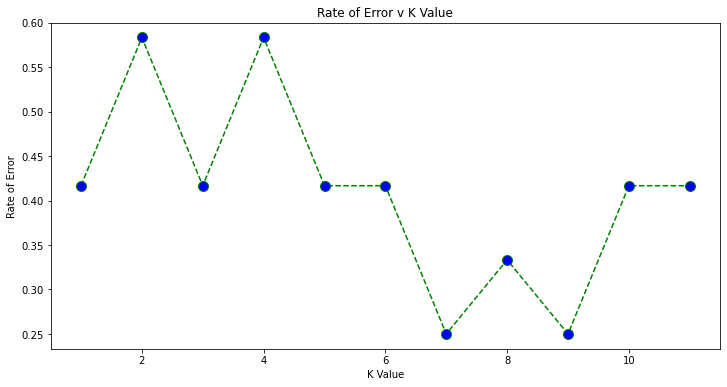

In [49]:
# K=7 & K=9 have the same accuracy.
# Need to find out the error rate and best possible value since we have 7 and 9
# with same accuracy
errorArray = []
for i in range (1,12):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(trainX, trainY)
    predictedKnnOfI = kNN.predict(testX)
    errorArray.append(np.mean(predictedKnnOfI != testY))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 12), errorArray, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rate of Error v K Value')
plt.xlabel('K Value')
plt.ylabel('Rate of Error')
print("Least Error: ", min(errorArray), "@ k = ", errorArray.index(min(errorArray))+1)

In [50]:
# with the Least error possibility been 7.
# i calculated accuracy, precision, recall and F1 score with k=7
print("Accuracy: ", metrics.accuracy_score(testY, predictedKnnY7))
print("Precision: ", metrics.precision_score(testY, predictedKnnY7))
print("Recall: ", metrics.recall_score(testY, predictedKnnY7))
print("F1 Score: ", metrics.f1_score(testY, predictedKnnY7))

Accuracy:  0.75
Precision:  0.8
Recall:  0.8888888888888888
F1 Score:  0.8421052631578948


In [51]:
#Predicted games using Naive Bayes' Gaussian Model
predictedY

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0])

In [52]:
#Predicted games using KNN Model
predictedKnnY7

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])